# Convex Burgers' Equation 1D_Finite Difference Schemes

$$ \partial _{t}u + H\left ( \partial _{x}u \right ) =0 \quad u(x,0)=u_{0}(x) \quad \text{for } t>0 \text{ , } x \in \left [ a , b \right ]$$  
- $\Omega = [-1 , 1[$
- $u(x,0) = -cos(\pi x)$
- $H$ Convex  
- $H(p)=\frac{(p+\alpha )^{2}}{2}$
- $\partial _{p} H=p+\alpha$
- Viscosity solution (Hopf-Lax formula) : $u(x,t)=\underset{y \in \Omega}{inf} \left \{ tH^{*}\left(\frac{x-y}{t}\right)-cos(\pi y) \right \}$  
With $H^{*}(p)=\underset{q}{sup}\left \{pq-H(q)\right \}=\frac{p^{2}}{2}-\alpha p$

## Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math 
import nbimporter
## You'll need to install nbimporter : "pip install nbimporter"
from Functions_FiniteDifference_1D import *

## Inputs 

In [2]:
a=-1 ; b=1
#tf=0.01
tf=0.5/(math.pi**2)  # The solution is still smooth
#tf=1.5/math.pi**2   # The solution has a discontinous derivative
print("End time 1 = ",round(tf,4))
def Initial_condition(x):
    return - np.cos(math.pi*x)

alpha = 1.0

#Legendre-Frenchel conjugate
def Hstar(p):
    return 0.5*(p**2)-alpha*p

def fct(x,y,t):
    return t*Hstar((x-y)/t)+Initial_condition(y)

def exact_solution(x,t):
    min_value = b
    for y in np.linspace(a,b,101):
        if fct(x,min_value,t) > fct(x,y,t): min_value = y
    return fct(x,min_value,t)

# Convex Burgers' equation
def H(p):
    return 0.5*((p+alpha)**2)

# H'(p)
def dpH(p):
    return p+alpha

arg=[a,b,tf,Initial_condition,exact_solution,H,dpH]

End time 1 =  0.0507


## Initial condition

Text(0, 0.5, '$u_0(x)$')

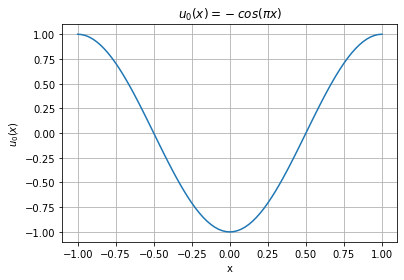

In [3]:
X= np.linspace(a,b,81) # creating the space grid    
U0 = np.zeros(81)
for i in range(len(X)):
    U0[i] = Initial_condition(X[i]) 
plt.plot(X,U0)
plt.grid()
plt.title("$u_0(x)=-cos(\pi x)$")
plt.xlabel('x')
plt.ylabel("$u_0(x)$") 

## Viscosity solution

Text(0, 0.5, '$u(x,t)$')

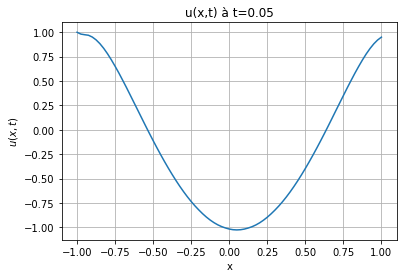

In [4]:
X= np.linspace(a,b,81) # creating the space grid 
Uex = np.zeros(81)
for i in range(len(X)):
    Uex[i] = exact_solution(X[i],tf) 
plt.plot(X,Uex)
plt.grid()
plt.title("u(x,t) à t=%1.2f" %tf)
plt.xlabel('x')
plt.ylabel("$u(x,t)$") 

## 1st order Schemes (Lax-Friedrichs, Godunov, Roe)

/home/amal/GitHub/mfg/NumericalMethods_HJB/Presented_final/FiniteDifferenceMethods/NumericalTest/Functions_FiniteDifference_1D.py:591: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  plt.tight_layout()


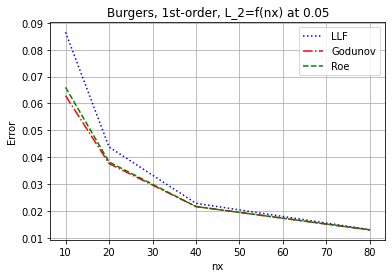

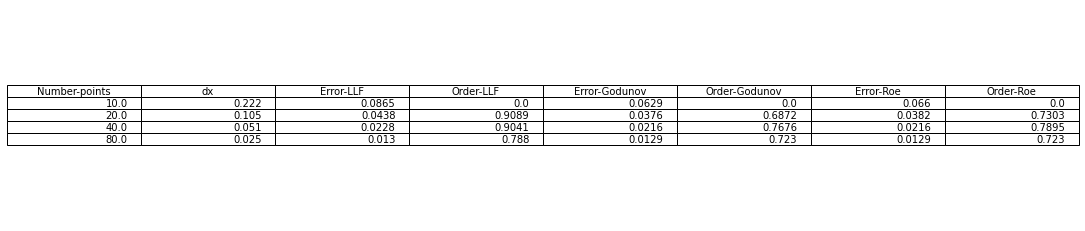

0

In [5]:
# Rate of convergence
Nx = [10,20,40,80]  
dt=0.001
txt="Burgers, 1st-order"
ordre=2 # choose relatif-error : L2, L1, L_inf (np.inf)
Error_nbpoints(Nx=Nx,dt=dt,fct=frst_schemes_error,arg=arg,text=txt,order=ordre)

0

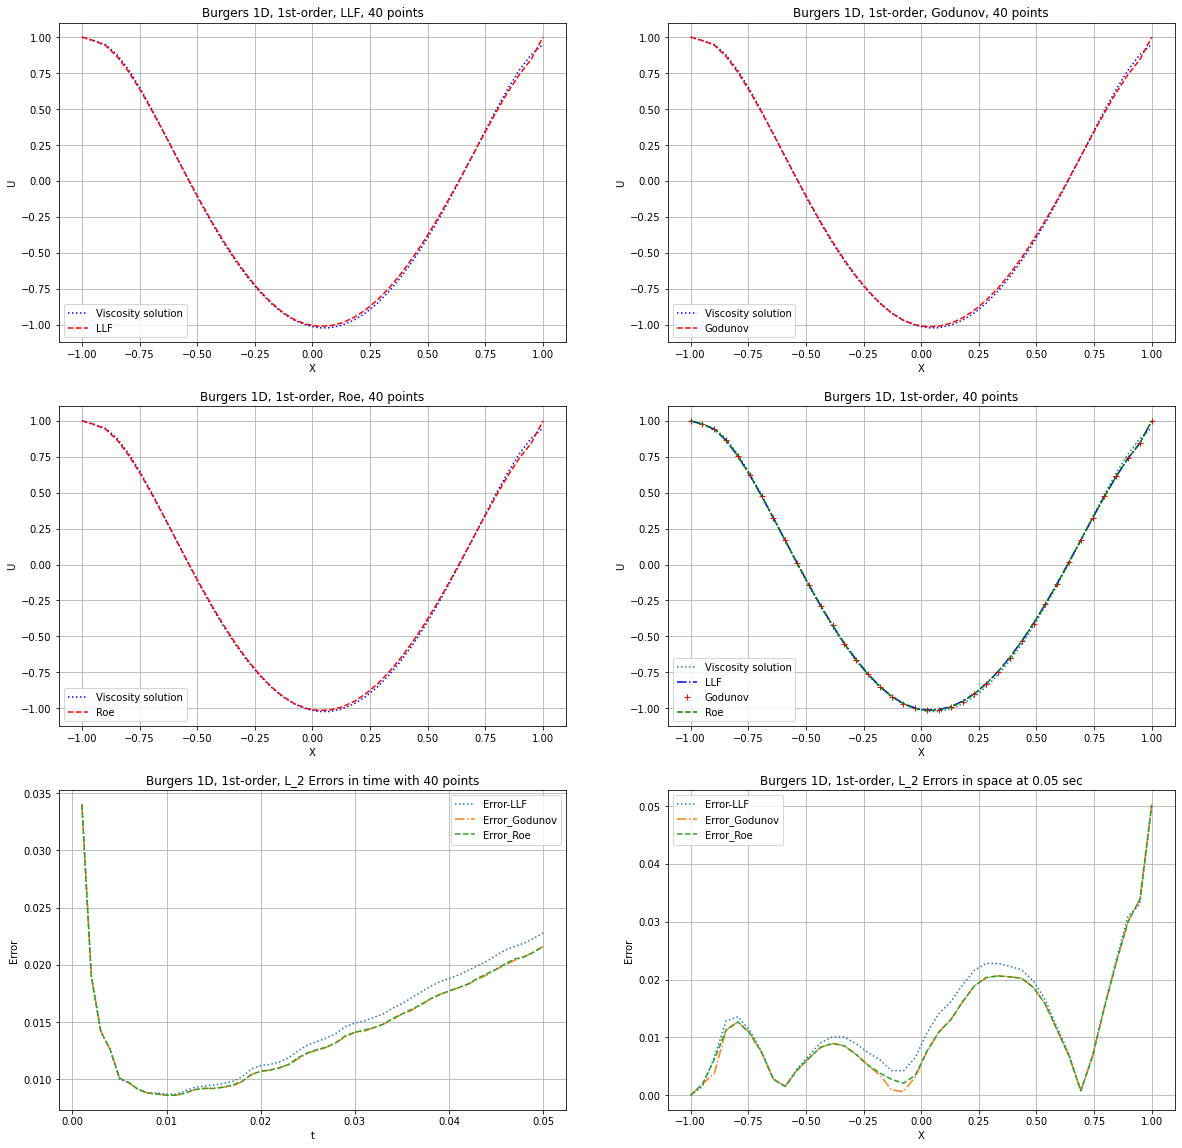

In [6]:
nx = 40
dt=0.001
txt="Burgers 1D, 1st-order"
ordre=2 # choose relatif-error : L2, L1, L_inf (np.inf)
solutionAll_error(nx=nx,dt=dt,fct=frst_schemes_error,arg=arg,text=txt,order=ordre) 

## TVD Schemes

/home/amal/GitHub/mfg/NumericalMethods_HJB/Presented_final/FiniteDifferenceMethods/NumericalTest/Functions_FiniteDifference_1D.py:591: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  plt.tight_layout()


<Figure size 432x288 with 0 Axes>

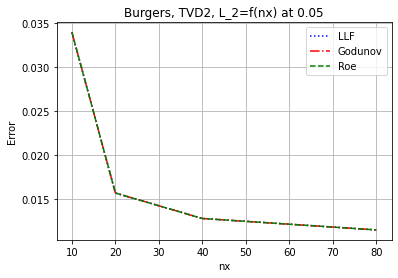

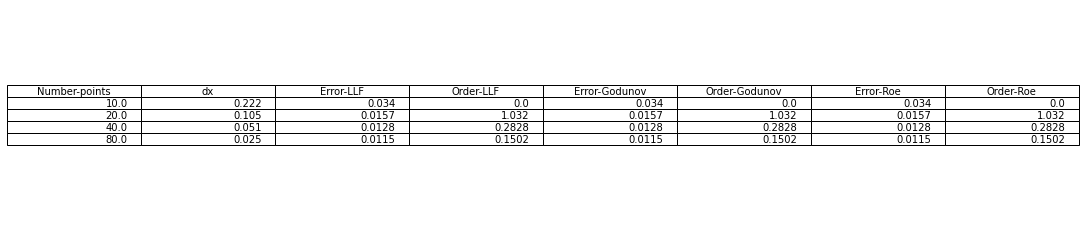

<Figure size 432x288 with 0 Axes>

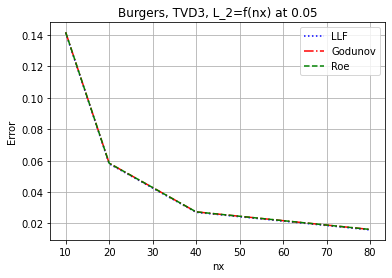

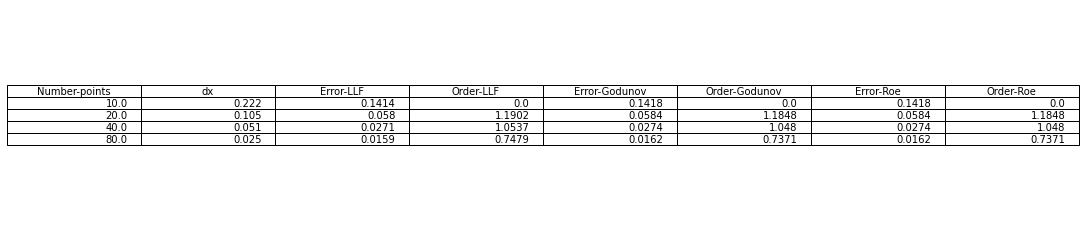

0

In [7]:
# Rate of convergence
Nx = [10,20,40,80] 
dt=0.001

# TVD2
plt.figure(1)
txt="Burgers, TVD2"
ordre=2 # choose relatif-error : L2, L1, L_inf (np.inf)
Error_nbpoints(Nx=Nx,dt=dt,fct=TVD_deg2_error,arg=arg,text=txt,order=ordre)
# TVD3
plt.figure(2)
txt="Burgers, TVD3"
ordre=2 # choose relatif-error : L2, L1, L_inf (np.inf)
Error_nbpoints(Nx=Nx,dt=dt,fct=TVD_deg3_error,arg=arg,text=txt,order=ordre)

0

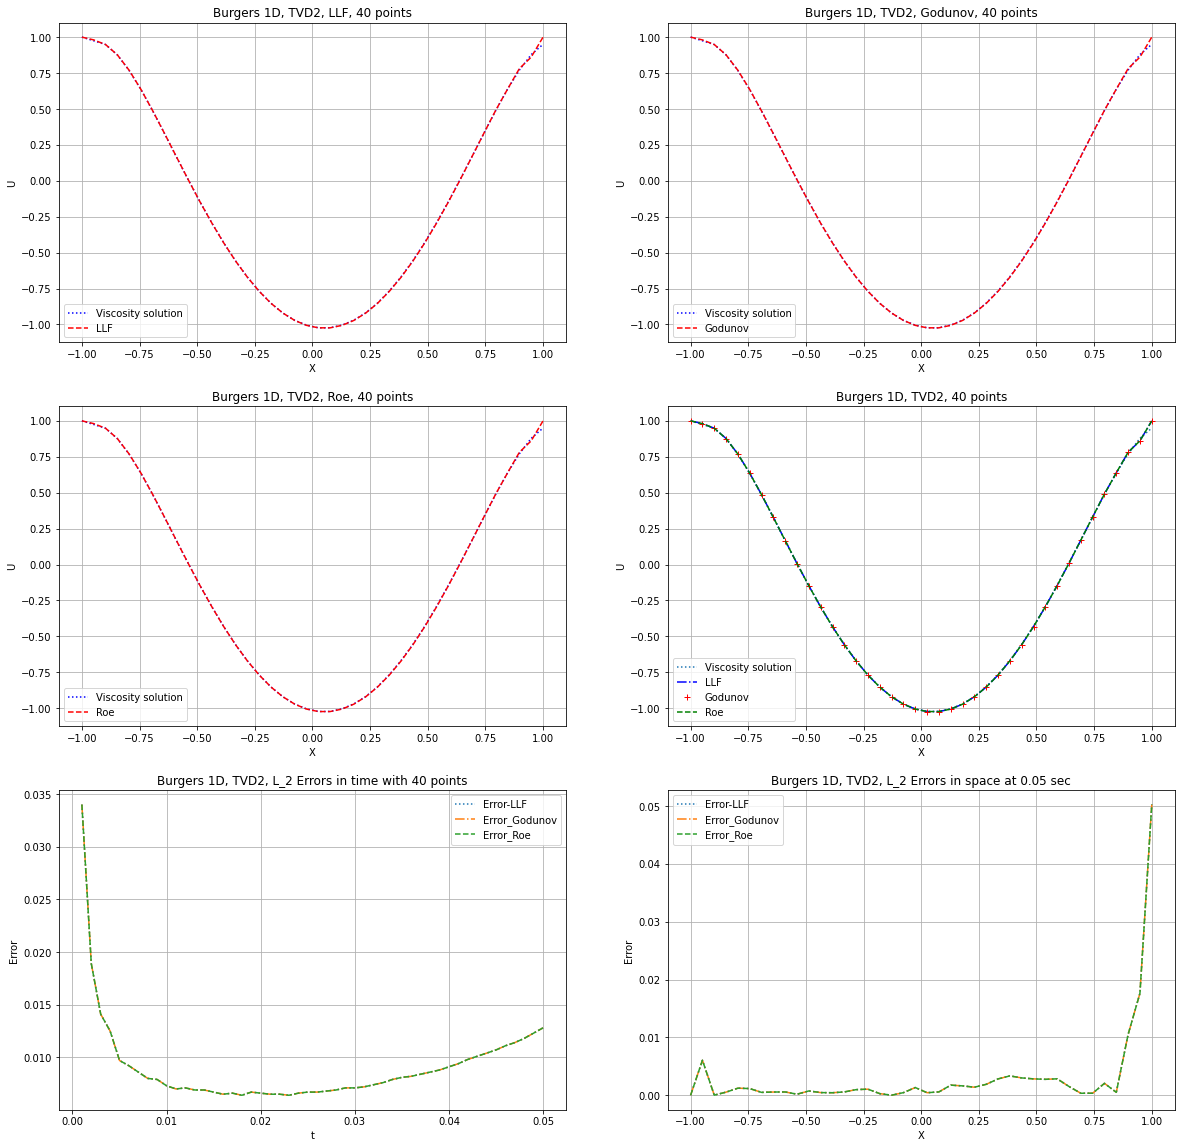

In [8]:
nx = 40
dt=0.001
txt="Burgers 1D, TVD2"
ordre=2 # choose relatif-error : L2, L1, L_inf (np.inf)
solutionAll_error(nx=nx,dt=dt,fct=TVD_deg2_error,arg=arg,text=txt,order=ordre) 

0

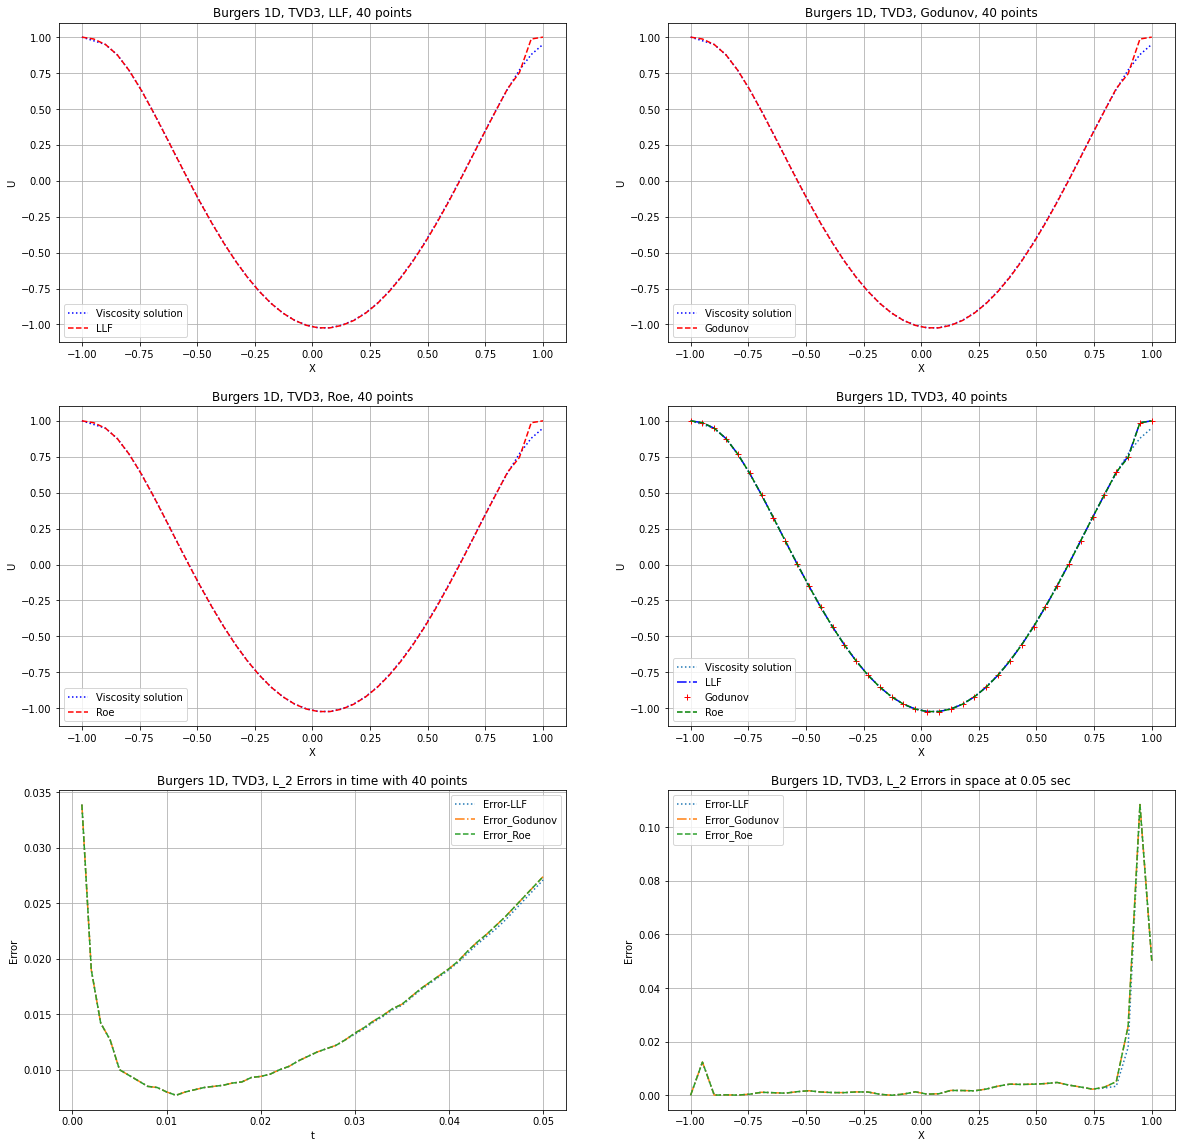

In [9]:
nx = 40
dt=0.001
txt="Burgers 1D, TVD3"
ordre=2 # choose relatif-error : L2, L1, L_inf (np.inf)
solutionAll_error(nx=nx,dt=dt,fct=TVD_deg3_error,arg=arg,text=txt,order=ordre) 

# ENO Schemes

/home/amal/GitHub/mfg/NumericalMethods_HJB/Presented_final/FiniteDifferenceMethods/NumericalTest/Functions_FiniteDifference_1D.py:591: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  plt.tight_layout()


<Figure size 432x288 with 0 Axes>

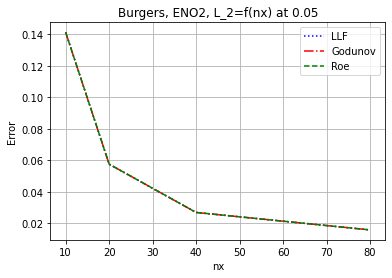

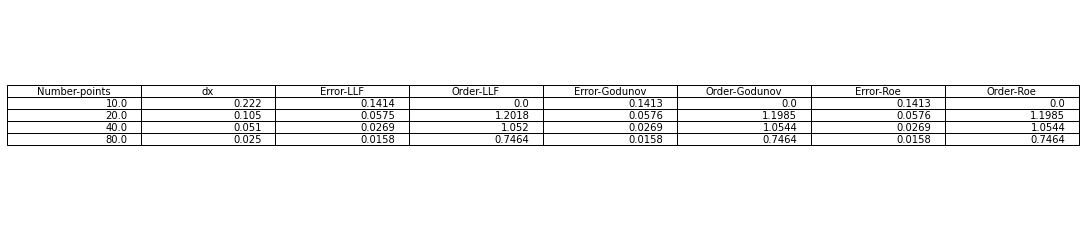

<Figure size 432x288 with 0 Axes>

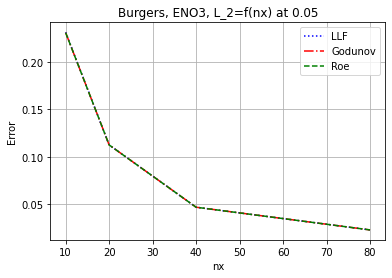

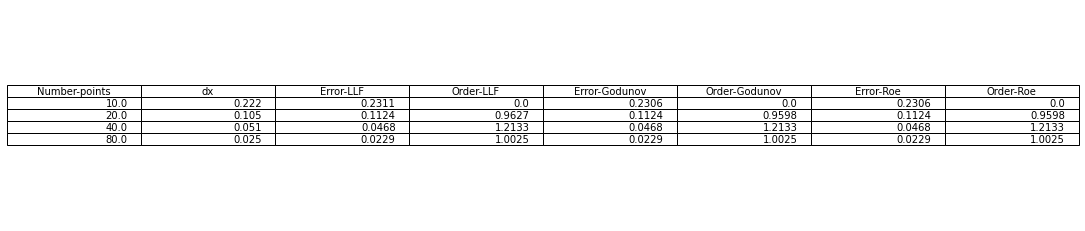

0

In [10]:
# Rate of convergence
Nx = [10,20,40,80] 
dt=0.001

# ENO2
plt.figure(1)
txt="Burgers, ENO2"
ordre=2 # choose relatif-error : L2, L1, L_inf (np.inf)
Error_nbpoints(Nx=Nx,dt=dt,fct=ENO_deg2_error,arg=arg,text=txt,order=ordre)
# ENO3
plt.figure(2)
txt="Burgers, ENO3"
ordre=2 # choose relatif-error : L2, L1, L_inf (np.inf)
Error_nbpoints(Nx=Nx,dt=dt,fct=ENO_deg3_error,arg=arg,text=txt,order=ordre)

0

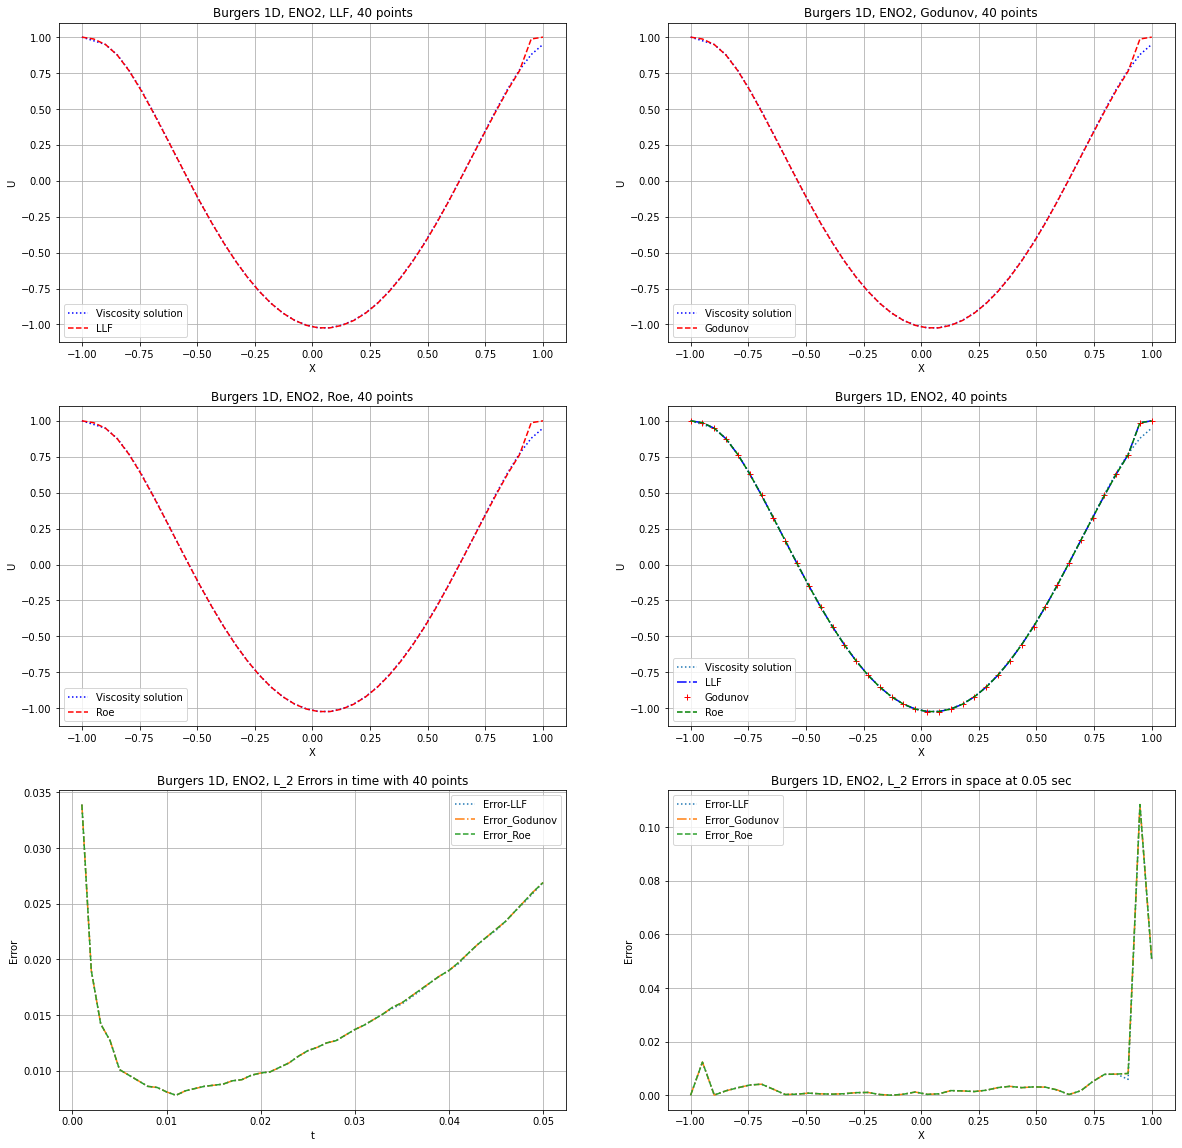

In [11]:
nx = 40
dt=0.001
txt="Burgers 1D, ENO2"
ordre=2 # choose relatif-error : L2, L1, L_inf (np.inf)
solutionAll_error(nx=nx,dt=dt,fct=ENO_deg2_error,arg=arg,text=txt,order=ordre)  

0

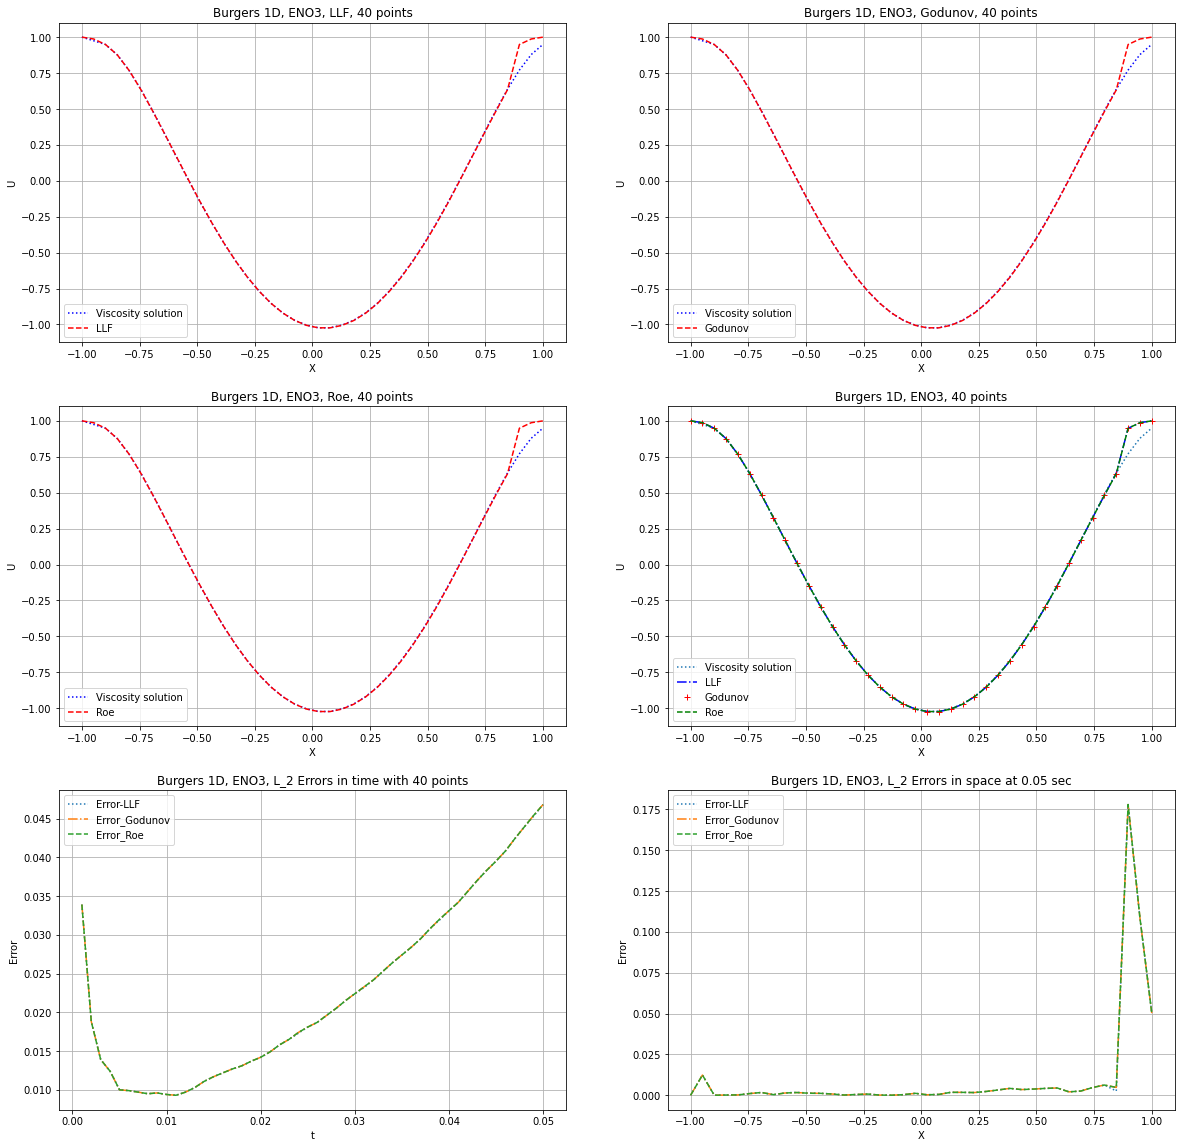

In [12]:
nx = 40
dt=0.001
txt="Burgers 1D, ENO3"
ordre=2 # choose relatif-error : L2, L1, L_inf (np.inf)
solutionAll_error(nx=nx,dt=dt,fct=ENO_deg3_error,arg=arg,text=txt,order=ordre) 

## WENO Schemes

/home/amal/GitHub/mfg/NumericalMethods_HJB/Presented_final/FiniteDifferenceMethods/NumericalTest/Functions_FiniteDifference_1D.py:591: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  plt.tight_layout()


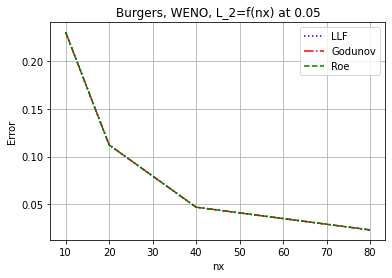

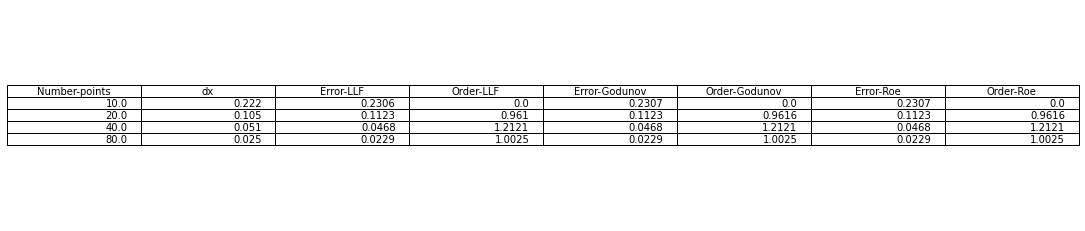

0

In [13]:
# Rate of convergence
Nx = [10,20,40,80] 
dt=0.001

txt="Burgers, WENO"
ordre=2 # choose relatif-error : L2, L1, L_inf (np.inf)
Error_nbpoints(Nx=Nx,dt=dt,fct=WENO_deg5_error,arg=arg,text=txt,order=ordre)

0

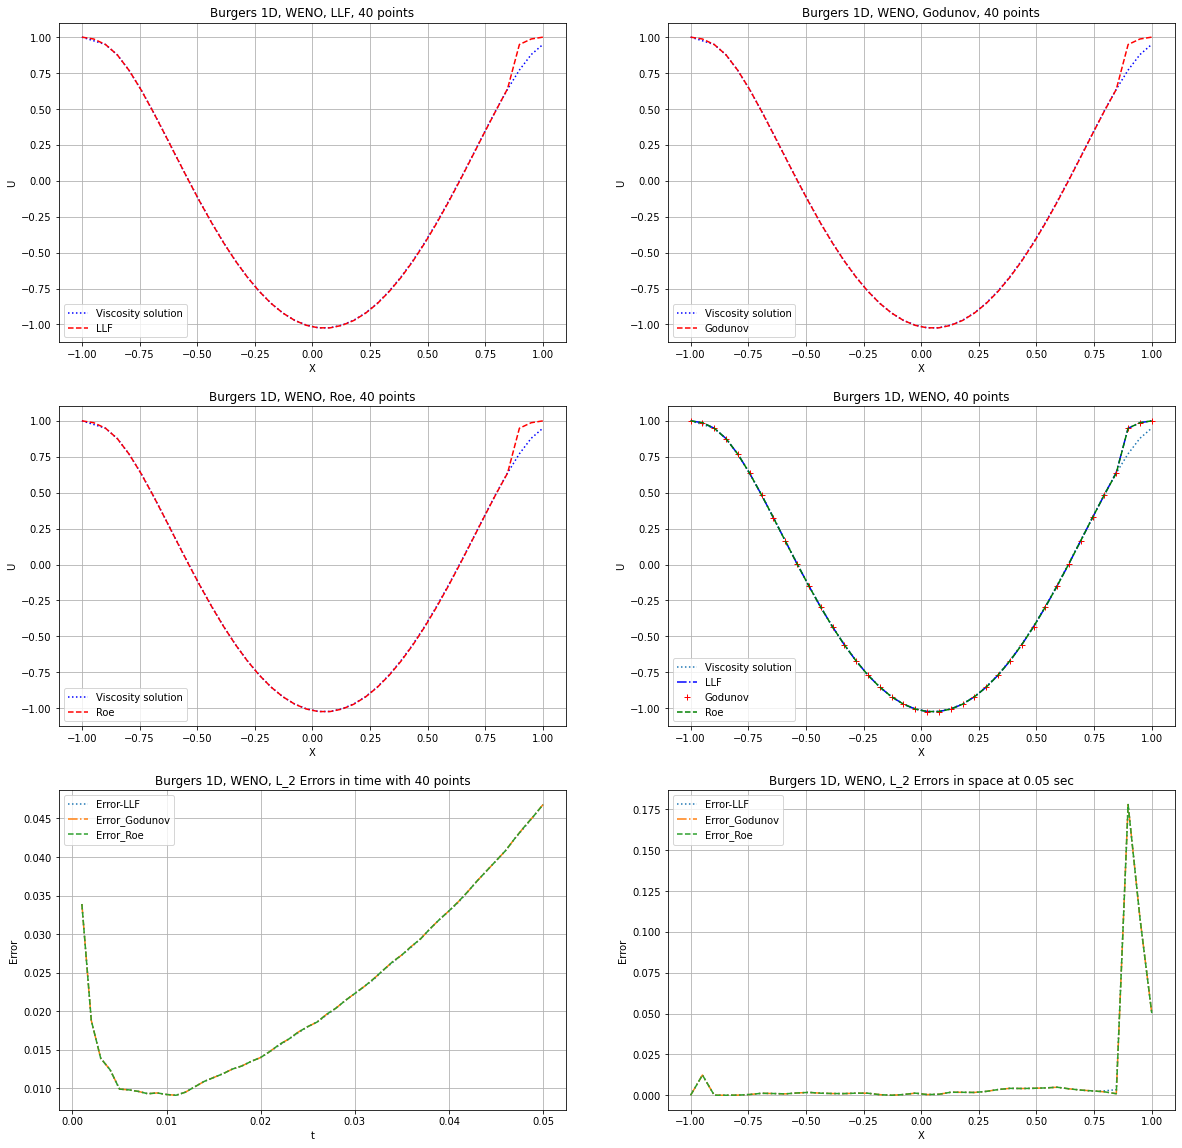

In [14]:
nx = 40
dt=0.001
txt="Burgers 1D, WENO"
ordre=2 # choose relatif-error : L2, L1, L_inf (np.inf)
solutionAll_error(nx=nx,dt=dt,fct=WENO_deg5_error,arg=arg,text=txt,order=ordre) 

### Points to develop

- Boundary conditions !!
- Time discretization !!